In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

###### REPLACING OTHER NAN VALUES

In [3]:
def replace_other_nan(data):
    data.replace(['None','none','-','NONE'],np.nan,inplace=True)
    return data

###### REMOVE COLUMN WITH HIGH NAN

In [4]:
def remove_column_with_high_nan(data,threshold):
    for i in data.columns:
        num = data[i].isnull().sum()
        percent = (num/len(data[i]))*100
        if(percent>threshold):
            data.drop(i,axis=1,inplace=True)
    return data

###### SPLITTING NUMERICAL AND CATEGORICAL COLUMNS

In [5]:
def spliting_numerical_categorical(data):
    numerical_columns = data.select_dtypes(['float','int'])
    categorical_columns = data.select_dtypes(['object'])
    return numerical_columns,categorical_columns

###### NUMERICAL NAN COLUMNS

In [6]:
def columns_with_nan(train):
    target_columns = []
    for i in train.columns:
        if(train[i].hasnans):
            target_columns.append(i)
    return target_columns

###### COLUMNS WITHOUT NAN

In [7]:
def generate_data_without_nan(data,column_names):
    return data.drop(column_names,axis=1)

###### HANDLING NUMERICAL NAN VALUES

MEAN IMPUTATION

In [8]:
def mean_imputation_numerical(lst):
    lst = lst.fillna(lst.mean())
    return lst

MODE IMPUTATION

In [9]:
def mode_imputation_numerical(lst):
    lst = lst.fillna(lst.mode().iloc[0])
    return lst

REGESSION IMPUTATION

In [10]:
def gradient_boosting_model():
    return GradientBoostingRegressor

In [11]:
def find_missing_index(numerical_columns,target_columns):
    missing_index = numerical_columns[target_columns][numerical_columns[target_columns].isnull()].index
    return missing_index

In [12]:
def regression_imputation_numerical(x,y,missing_index):
    y = y.fillna(y.mean())
    model = GradientBoostingRegressor()
    model.fit(x,y)
    prediction = model.predict(x)
    prediction = pd.Series(prediction,index=y.index)
    y.loc[missing_index] = prediction.loc[missing_index]
    return y

MICE IMPUTATION NUMERICAL

In [13]:
def mice_imputation_numeric(data):
    
    iter_imp_numeric = IterativeImputer(GradientBoostingRegressor())
    imputed_train = iter_imp_numeric.fit_transform(data)
    data_imputed = pd.DataFrame(imputed_train, columns = data.columns, index= data.index)
    return data_imputed

###### HANDLING CATEGORICAL NAN VALUES

MODE IMPUTATION

In [14]:
def mode_imputation_categorical(lst):
    mode = lst.mode().iloc[0]
    df = lst.fillna(mode)
    return df

###### CATEGORICAL DATA ENCODING

In [15]:
def frequency_encoding_categorical(categorical_column):
    encoder_dictionary = {}
    
    for i in categorical_column.columns:
        encoder_dictionary[i] = (categorical_column[i].value_counts()/len(categorical_column)).to_dict()
    
    for i in categorical_column.columns:
        categorical_column[i] = categorical_column[i].map(encoder_dictionary[i])
        
    return categorical_column

###### DATA CONCATINATION

In [16]:
def concat_numerical_categorical(numerical_column,categorical_column):
    df = pd.concat([numerical_column,categorical_column],axis=1)
    return df

###### DROPING HIGH UNIQUE COLUMNS 

In [17]:
def dropping_high_uniqe(df,threshold):
    for i in df.columns:
        if((df[i].nunique()/len(df[i]))*100>threshold):
            df.drop(i,axis=1,inplace=True)
    return df

###### TRAIN TEST SPLIT

In [18]:
def train_test_spliting(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
    return X_train,X_test,y_train,y_test

###### MODEL BUILDING 

LINEAR REGRESSION

In [19]:
def liner_regression_model(X_train, X_test, y_train, y_test):
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    
    print('LINEAR REGRESSION')
    plt.scatter(y_test,prediction)
    
    error_lr  = metrics.mean_absolute_error(y_test,prediction)
    
    return model,prediction,error_lr

In [20]:
def decision_tree_model(X_train, X_test, y_train, y_test):
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train,y_train)
    dt_prediction = dt_model.predict(X_test)

    print('DECISION TREE')
    plt.scatter(y_test,dt_prediction,)
    
    error_dt = metrics.mean_absolute_error(y_test,dt_prediction)
    
    return dt_model,dt_prediction,error_dt

In [21]:
def random_forest_model(X_train, X_test, y_train, y_test):
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train,y_train)
    rf_prediction = rf_model.predict(X_test)
    
    print('RANDOM FOREST')
    plt.scatter(y_test,rf_prediction)
    
    error_rf = metrics.mean_absolute_error(y_test,rf_prediction)
    
    return rf_model,rf_prediction,error_rf

In [22]:
def gradient_boosting_model(X_train, X_test, y_train, y_test):
    gb_model = GradientBoostingRegressor()
    gb_model.fit(X_train,y_train)
    gb_prediction = gb_model.predict(X_test)
    
    print('GRADIENT BOOSTING')
    plt.scatter(y_test,gb_prediction)
    
    error_gb = metrics.mean_absolute_error(y_test,gb_prediction)
    
    return gb_model,gb_prediction,error_gb

In [23]:
def xgBoost_model(X_train, X_test, y_train, y_test):
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train,y_train)
    xgb_prediction = xgb_model.predict(X_test)
    
    print('XGBOOSTING')
    plt.scatter(y_test,xgb_prediction)
    
    error_xg = metrics.mean_absolute_error(y_test,xgb_prediction)
    
    return xgb_model,xgb_prediction,error_xg

In [24]:
def helper(data):
    
    data = replace_other_nan(data)
    data = remove_column_with_high_nan(data,90)
    
    numerical_column,categorical_column = spliting_numerical_categorical(data)
    
    
    numerical_column_with_nan = columns_with_nan(numerical_column)
    
#     for i in numerical_column_with_nan:
#         percent = ((numerical_column[i].isnull().sum())/len(numerical_column[i]))*100
        
#         if(percent<=5):
#             numerical_column[i] = mean_imputation_numerical(numerical_column[i])
#         elif(percent>5 and percent<=10):
#             numerical_column[i] = mode_imputation_numerical(numerical_column[i])
#         else:
#             x = generate_data_without_nan(numerical_column,numerical_column_with_nan)
#             missing_index = find_missing_index(numerical_column,i)
#             numerical_column[i] = regression_imputation_numerical(x,numerical_column[i],missing_index)

    numerical_column = mice_imputation_numeric(numerical_column)
            

    categorical_column_with_nan = columns_with_nan(categorical_column)

    for i in categorical_column_with_nan:
        categorical_column[i] = mode_imputation_categorical(categorical_column[i])
        
    categorical_column = frequency_encoding_categorical(categorical_column)
    
    df = concat_numerical_categorical(numerical_column,categorical_column)
    
    df = dropping_high_uniqe(df,95)
    
    return df

In [25]:
def model_building(df,y):
    X_train, X_test, y_train, y_test = train_test_spliting(df,y)
    
    ml_models = {}
    
    ml_models['Linear Regression'] = liner_regression_model(X_train, X_test, y_train, y_test)
    ml_models['Decision Tree'] = decision_tree_model(X_train, X_test, y_train, y_test)
    ml_models['Random forest'] = random_forest_model(X_train, X_test, y_train, y_test)
    ml_models['Gradient Boosting'] = gradient_boosting_model(X_train, X_test, y_train, y_test)
    ml_models['XGBoosting'] = xgBoost_model(X_train, X_test, y_train, y_test)
        
    return ml_models

###### IMPORT DATA

In [52]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [42]:
y = train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)

LINEAR REGRESSION
DECISION TREE
RANDOM FOREST
GRADIENT BOOSTING
XGBOOSTING
15.590860605239868


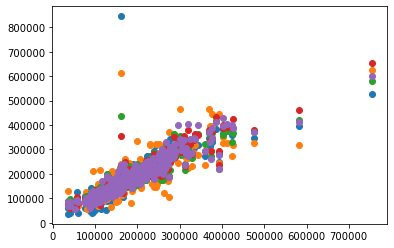

In [43]:
import time

start = time.time()
df = helper(train)
result = model_building(df,y)
end = time.time()

print(end-start)

In [44]:
algo = []
mse = []
for key, value in result.items():
    algo.append(key)
    mse.append(value[2])

In [45]:
temp = pd.DataFrame({
    'MODEL': algo,
    'ERROR': mse
})

In [46]:
temp

,MODEL,ERROR
0,Linear Regression,20588.881566
1,Decision Tree,27248.308219
2,Random forest,17960.596826
3,Gradient Boosting,16681.016820
4,XGBoosting,18146.512236


In [47]:
model = result['Gradient Boosting'][0]
model

GradientBoostingRegressor()

In [48]:
df = helper(test)

In [51]:
output = model.predict(df)

In [53]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": output
    })

In [55]:
submission.to_csv('submission.csv')